# Материалы для статьи

In [14]:
# Подключение модулей
import pandas as pd, numpy as np
# import FireAnalysis as fr, FireAnalysis2 as fr2 # вспомогательные функции
# import pyodbc as sqlMS # связь с Access
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [24]:
# Создание связи с БД "Пожары"
connStr = (r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};" r"DBQ=d:\FR\FR.accdb;")
conn = sqlMS.connect(connStr) # создать соединение с БД
cursor = conn.cursor()

# Условия развития пожара - добавить условия развития пожаров
strSQL = f'''
SELECT [F83]+[F84]+[F85]+[F86]+[F87] AS T, [F91]+[F92]+[F93] AS Stv, [F5]+TimeSerial([F61],[F62],0) AS T1, [F71]+TimeSerial([F159],[F160],0) AS T2, FR2017.F2
FROM FR2017
WHERE ((([F83]+[F84]+[F85]+[F86]+[F87])>0) AND (([F91]+[F92]+[F93])>0) AND ((FR2017.F1)=1146) AND ((FR2017.F4)=0));
'''
# Ранг пожара по Московской области
strSQL1 = f'''
SELECT тблРангF2.F2, тблРангF2.ПСГ, тблРангF2.АдмЦентр, тблРангF2.Ранг, тблРангF2.КолОтд
FROM тблРангF2
WHERE (((тблРангF2.F1)=1146));
'''
# Запрос - Пожары Московская область
# df = pd.read_sql(strSQL, conn)
# df['D'] = (df.T2-df.T1).dt.seconds/60  # Интервал в минутах
# df

dr = pd.read_sql(strSQL1, conn)

In [22]:
# df.to_pickle('pkl/Article.pkl')
df = pd.read_pickle('pkl/Article.pkl') 

In [23]:
df = df.loc[(df['D'] > 9) & (df['T'] > 0) & (df['Stv'] > 0)]

# Интервалы MinMax
df['dT'] = (df['T'] - df['T'].min())/(df['T'].max() - df['T'].min())
df['dStv'] = (df['Stv'] - df['Stv'].min())/(df['Stv'].max() - df['Stv'].min())
df['dD'] = (df['D'] - df['D'].min())/(df['D'].max() - df['D'].min())
df['S'] = df['dT'] + df['dStv'] + df['dD']  # Сумма по MinMax
df = df.sort_values(by='S')  # Сортировка по столбцу
df = df.reset_index(drop=True)
df

<ipython-input-23-95cc811c5a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dT'] = (df['T'] - df['T'].min())/(df['T'].max() - df['T'].min())
<ipython-input-23-95cc811c5a17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dStv'] = (df['Stv'] - df['Stv'].min())/(df['Stv'].max() - df['Stv'].min())
<ipython-input-23-95cc811c5a17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,T,Stv,T1,T2,F2,D,dT,dStv,dD,S
0,1.0,1.0,2017-06-18 03:20:00,2017-06-18 03:30:00,100.0,10.0,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,2017-04-23 12:03:00,2017-04-23 12:13:00,481.0,10.0,0.000000,0.000000,0.000000,0.000000
2,1.0,1.0,2017-08-02 04:30:00,2017-08-02 04:40:00,250.0,10.0,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,2017-05-02 19:18:00,2017-05-02 19:28:00,290.0,10.0,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,2017-03-31 17:25:00,2017-03-31 17:35:00,460.0,10.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
24128,4.0,6.0,2017-05-01 19:32:00,2017-05-03 19:00:00,470.0,1408.0,0.066667,0.238095,0.983122,1.287884
24129,11.0,8.0,2017-03-13 22:52:00,2017-03-14 16:40:00,500.0,1068.0,0.222222,0.333333,0.744023,1.299578
24130,11.0,9.0,2017-12-31 15:32:00,2018-01-01 11:03:00,370.0,1171.0,0.222222,0.380952,0.816456,1.419630
24131,21.0,13.0,2017-05-21 03:50:00,2017-05-22 16:02:00,282.0,732.0,0.444444,0.571429,0.507736,1.523609


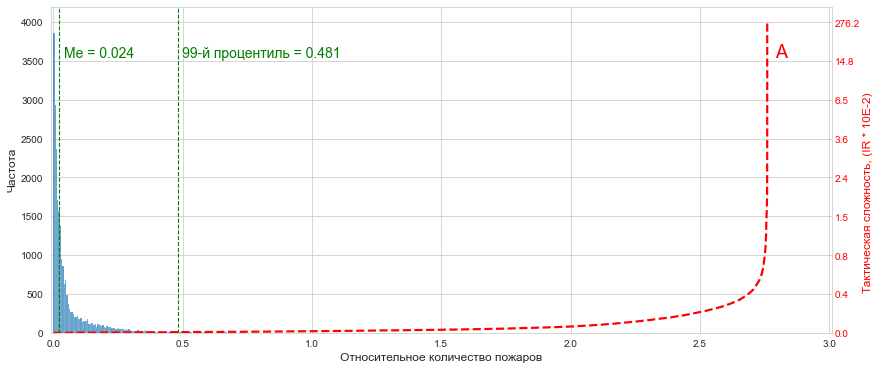

In [4]:
sns.set_style("whitegrid")  #  

fig, ax = plt.subplots(figsize = (14,6))
sns.histplot(df["S"], binwidth=0.005)

# Медиана
x = df['S'].median()
plt.axvline(x, color='green', linestyle='dashed', linewidth=1.1)
plt.text(x+0.018, 3550, 'Me = ' + str(round(x,3)), color='green', size=14)

# 95 процентиль (95th percentile)
# x = df['S'].quantile(0.95)
# plt.axvline(x, color='green', linestyle='dashed', linewidth=1.1)
# plt.text(x+0.01, 3250, '95-й процентиль = ' + str(round(x,3)), color='green', size=14)

# 99 процентиль (99th percentile)
x = df['S'].quantile(0.99)
plt.axvline(x, color='green', linestyle='dashed', linewidth=1.1)
plt.text(x+0.018, 3550, '99-й процентиль = ' + str(round(x,3)), color='green', size=14)

plt.text(2.79, 3550, 'A', color='red', size=18)
# Метки дополнительной оси
yt = [round(df.S[round(i)]*100,1) for i in np.arange(0, 24140, 3016.5)]
yv = range(0,4001,500)
for i in range(9): plt.text(3.02, yv[i]-50, yt[i], color='red', size=10)
plt.text(3.13, 550, 'Тактическая сложность, (IR * 10E-2)', color='red', size=12, rotation=90) # Intricata res (лат) - сложность обстановки

m = df.index.max()
sns.lineplot(x=2.76*df.index/m, y=df['S']*1448, color='red', linewidth=2.2, linestyle='dashed')
             
ax.set(xlim = [-0.01, 3.01])
ax.set_ylabel('Частота', size=12)
ax.set_xlabel('Относительное количество пожаров', size=12)

fig.savefig('img/Masht', dpi=300, bbox_inches = 'tight')

In [10]:
4000/df['S'].max()

1448.2758620689656

In [25]:
dr

,F2,ПСГ,АдмЦентр,Ранг,КолОтд
0,100,Балашихинский,ГО Балашиха,10,5
1,100,Балашихинский,ГО Балашиха,15,8
2,100,Балашихинский,ГО Балашиха,20,14
3,100,Балашихинский,ГО Балашиха,30,18
4,100,Балашихинский,ГО Балашиха,40,23
...,...,...,...,...,...
310,510,Электростальский,ГО Электросталь,10,4
311,510,Электростальский,ГО Электросталь,15,6
312,510,Электростальский,ГО Электросталь,20,14
313,510,Электростальский,ГО Электросталь,30,22


In [170]:
# Количество выездов с распределением по рангам
d1 = df[['F2','T']].copy()
d1['Rang'] = 0
 
def rng(f, a):
    ls = [0, *list(dr.КолОтд[dr.F2 == f])]
    ls[-1] = 1000
    if f in list(dr.F2):
        idx = [i for i in range(len(ls)-1) if a>ls[i] and a<=ls[i+1]][0]
        return dr.Ранг[dr.index[dr.F2 == f][0] + idx]
    else:
        return -1
    
d1.Rang = [rng(d1.F2[i], d1['T'][i]) for i in d1.index]
d1


,F2,T,Rang
0,100.0,1.0,10
1,481.0,1.0,-1
2,250.0,1.0,10
3,290.0,1.0,10
4,460.0,1.0,10
...,...,...,...
24128,470.0,4.0,10
24129,500.0,11.0,20
24130,370.0,11.0,20
24131,282.0,21.0,30


In [183]:
# Количество выездов по рангам в Мос.обл. за 2017 год
d1R = pd.DataFrame(d1['Rang'].value_counts())
d1R = d1R.drop(index=[-1])  # Удаление строки с индексом -1 - это какие-то ошибочные индексы районов Мос.области
d1R['Fract'] = [round(d1R.Rang[i]/d1R.Rang.sum()*100,2) for i in d1R.index]  # Подсчет процентов
d1R                   

,Rang,Fract
10,20918,97.41
15,464,2.16
20,82,0.38
30,9,0.04
40,1,0.00
